# Step 2: Feature Engineering
## Convert 100K Clean Tweets to Numbers for Machine Learning

This notebook will:
1. Load cleaned tweets from Step 1
2. Convert text to TF-IDF features
3. Create train/test splits
4. Analyze feature importance

In [1]:
#1: Setup and imports
import sys
import os
sys.path.append('..')

from src.features.feature_engineering import FeatureEngineer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config.settings import *

print(" Step 2: Feature Engineering")
print(" Ready to convert text to numbers!")

✅ Config loaded
 Step 2: Feature Engineering
 Ready to convert text to numbers!


In [2]:
# Cell 2: Load cleaned data from Step 1
print(" Loading cleaned data from Step 1...")

try:
    cleaned_data = pd.read_csv(CLEANED_DATA_FILE)
    print(f" Loaded {len(cleaned_data):,} clean tweets")
    print(f" Columns: {list(cleaned_data.columns)}")
    
    print(f"\n Sample cleaned tweets:")
    for i in range(3):
        print(f"{i+1}. [{cleaned_data.iloc[i]['sentiment']}]: {cleaned_data.iloc[i]['cleaned_text']}")
        
except FileNotFoundError:
    print(" Cleaned data not found!")
    print(" Please run Step 1 (01_data_exploration.ipynb) first")
    cleaned_data = None


 Loading cleaned data from Step 1...
 Loaded 95,022 clean tweets
 Columns: ['sentiment', 'tweet_id', 'date', 'query', 'user', 'text', 'cleaned_text', 'sentiment_label']

 Sample cleaned tweets:
1. [4]: awesome
2. [4]: yes
3. [0]: bed aaallll alone


In [3]:
# Cell 3: Create TF-IDF features
if cleaned_data is not None:
    print(" Converting text to TF-IDF features...")
    
    engineer = FeatureEngineer()
    
    # Convert text to features
    X, feature_names = engineer.create_features(cleaned_data['cleaned_text'])
    
    # Prepare labels (convert 0,4 → 0,1)
    y = cleaned_data['sentiment'].values
    y_binary = (y == 4).astype(int)
    
    print(f"\n Feature creation complete!")
    print(f" Feature matrix: {X.shape[0]:,} tweets × {X.shape[1]:,} features")
    print(f" Example features: {list(feature_names[:10])}")
    
    # Show label distribution
    unique, counts = np.unique(y_binary, return_counts=True)
    print(f" Label distribution:")
    for label, count in zip(unique, counts):
        emoji = "😢" if label == 0 else "😊"
        sentiment = "Negative" if label == 0 else "Positive"
        print(f"   {emoji} {sentiment}: {count:,} tweets")

 Converting text to TF-IDF features...
 FeatureEngineer ready!
 Converting 95,022 texts to numerical features...
 Feature creation complete:
    Matrix shape: (95,022 tweets × 10,000 features)
    Vocabulary size: 10,000 words/phrases
    Approx. memory usage: 4.3MB

 Feature creation complete!
 Feature matrix: 95,022 tweets × 10,000 features
 Example features: ['___', 'aaa', 'aaaah', 'aaah', 'aah', 'aaron', 'aaw', 'ab', 'abandoned', 'abc']
 Label distribution:
   😢 Negative: 47,805 tweets
   😊 Positive: 47,217 tweets


In [4]:
# Cell 4: Split data
print(" Splitting data into train/test sets...")

X_train, X_test, y_train, y_test = engineer.split_data(X, y_binary, test_size=0.2)

print(f"\n Data split summary:")
print(f"Training set: {X_train.shape[0]:,} tweets")
print(f"Test set: {X_test.shape[0]:,} tweets")
print(f"Features: {X_train.shape[1]:,} TF-IDF features")

 Splitting data into train/test sets...
 Splitting data: 80% train, 20% test
 Split complete:
    Training: 76,017 samples
    Testing: 19,005 samples

 Data split summary:
Training set: 76,017 tweets
Test set: 19,005 tweets
Features: 10,000 TF-IDF features


In [5]:
# 5: Analyze feature importance
print(" Analyzing most important features...")

feature_analysis = engineer.analyze_features(feature_names, X)

 Analyzing most important features...
 Analyzing feature importance...
 Top 10 most important features:
feature  avg_tfidf
    day   0.013803
   good   0.012374
   like   0.011257
   love   0.010588
   work   0.010559
  today   0.010161
    lol   0.009866
   time   0.009795
  going   0.009652
   quot   0.009570


 Creating feature analysis visualizations...


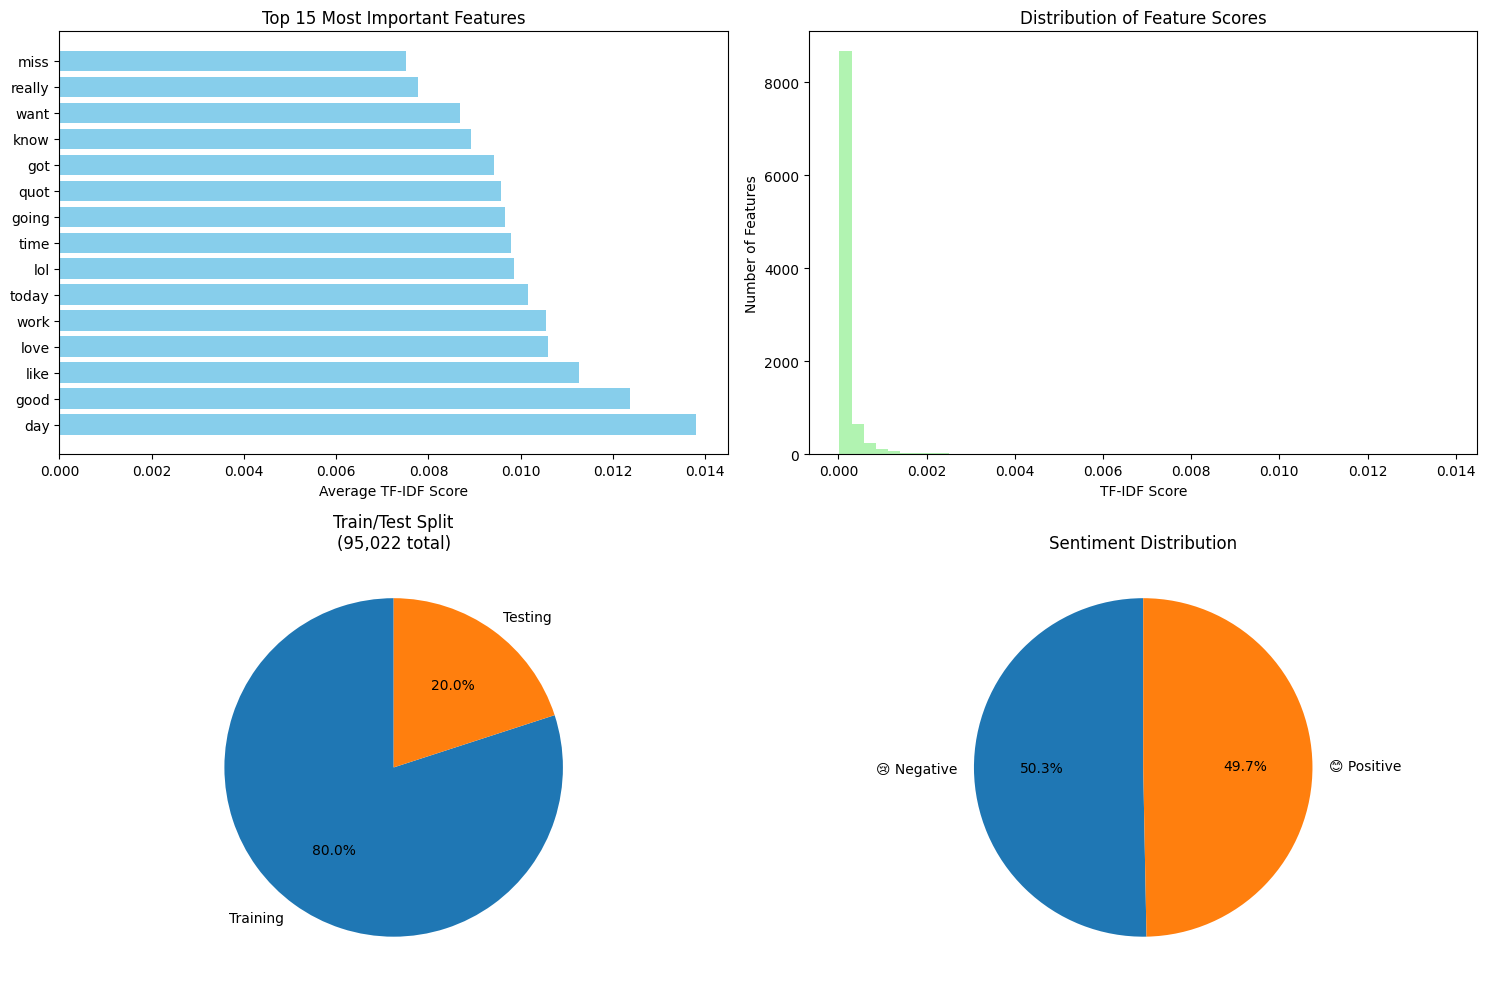

 Visualizations complete!


In [6]:
# Cell 6: Visualize features
print(" Creating feature analysis visualizations...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Top features bar chart
top_15 = feature_analysis.head(15)
ax1.barh(range(len(top_15)), top_15['avg_tfidf'], color='skyblue')
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['feature'])
ax1.set_title('Top 15 Most Important Features')
ax1.set_xlabel('Average TF-IDF Score')

# 2. Feature score distribution
ax2.hist(feature_analysis['avg_tfidf'], bins=50, alpha=0.7, color='lightgreen')
ax2.set_title('Distribution of Feature Scores')
ax2.set_xlabel('TF-IDF Score')
ax2.set_ylabel('Number of Features')

# 3. Train/test split pie chart
split_labels = ['Training', 'Testing']
split_counts = [len(y_train), len(y_test)]
ax3.pie(split_counts, labels=split_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title(f'Train/Test Split\n({len(y_train)+len(y_test):,} total)')

# 4. Sentiment distribution pie chart
sentiment_labels = ['😢 Negative', '😊 Positive']
sentiment_counts = [np.sum(y_binary == 0), np.sum(y_binary == 1)]
ax4.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
ax4.set_title('Sentiment Distribution')

plt.tight_layout()
plt.show()
print(" Visualizations complete!")

In [7]:
# Cell 7: Save processed features
print(" Saving processed features for machine learning...")

engineer.save_features(X_train, X_test, y_train, y_test, feature_names)

analysis_file = os.path.join(PROCESSED_DATA_DIR, 'feature_analysis.csv')
feature_analysis.to_csv(analysis_file, index=False)
print(f" Saved feature analysis to: {analysis_file}")

print(f"\n Step 2 Complete!")

 Saving processed features for machine learning...
 Saved features to: C:\Res_Projects\social_media_sentiment_analysis\models\features.pkl
 File size: 7.9MB
 Saved feature analysis to: C:\Res_Projects\social_media_sentiment_analysis\data\processed\feature_analysis.csv

 Step 2 Complete!
